In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [3]:
#first, lets try a bayes classifier with the class conditional densities assumed to be Gaussian. There are two categories, 0 and 1.
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]


split = 0.7 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]


X_0 = X_train[Y_train == 0]
X_1 = X_train[Y_train == 1]

#X_0 = data[data['category'] == 0].to_numpy()[:, :3]
#X_1 = data[data['category'] == 1].to_numpy()[:, :3]
#how to split data into test and train?


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the f

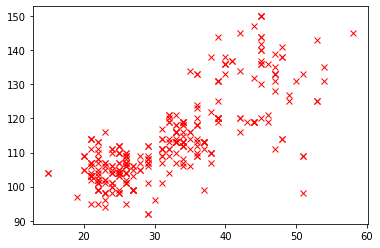

In [4]:
plt.plot(X_0[:,0], X_0[:,1], 'rx') #cholestrol vs age
#clearly they are not independent features

# Bayes Classifier with Gaussian Prior
   

In [5]:
#estimating mean, variance for class 0
#maximum likelihood estimate

u0 = np.mean(X_0, axis=0) #mean 
s0 = (X_0 - u0).T @ (X_0 - u0)/X_0.shape[0] #covariance
s0 = np.linalg.inv(s0)

#for class 1
u1 = np.mean(X_1, axis = 0)
s1 = (X_1 - u1).T @ (X_1 - u1)/X_1.shape[0]
s1 = np.linalg.inv(s1) #inverse of cov matrix

In [6]:
#decision boundary
p0 = X_0.shape[0]; p1 = X_1.shape[0]
p0 = p0/(p0 + p1); p1 = 1 - p0;
print('p0 = {}, p1 = {}'.format(p0, p1))
#priors chosen on basis of frequency of occurence in training data.
p = np.log(p0/p1)

s = 0.5*np.log(np.linalg.det(s0)/np.linalg.det(s1))
def g1(x):
    y = p + s -0.5*((x - u0) @ s0 @ (x-u0).T - (x - u1) @ s1 @ (x - u1))
    
    if (y > 0): 
        return 0
    else:return 1

p0 = 0.6175869120654397, p1 = 0.3824130879345603


In [7]:
#computing accuracy.
C = np.zeros((2,2)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = g1(X_test[i])
    C[y_pred, Y_test[i]] += 1
        

In [8]:
acc = (C[0,0] + C[1,1])/np.sum(C)
prec = (C[1,1])/(C[1,1] + C[1,0])
rec = C[1,1]/(C[1,1] + C[0,1])
f1 = 2*prec*rec/(prec + rec)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, f1 = {f1}')
print(f'Confusion Matrix = {C}')
# nearly 85 % accuracy obtained, in almost every case, no matter how the data is split.

Accuracy = 0.8502824858757062, Precision = 0.8698630136986302, Recall = 0.7888198757763976, f1 = 0.8273615635179155
Confusion Matrix = [[174.  34.]
 [ 19. 127.]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.28it/s]


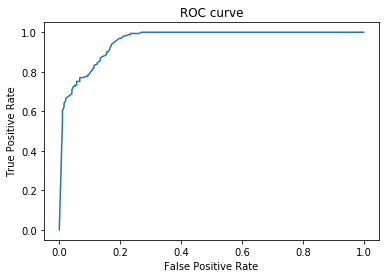

In [9]:
#Now, we will vary the priors, and plot the ROC curve.
from tqdm import tqdm
TP = []
FP = []
for p0 in tqdm(np.linspace(0.000000001,0.999999999999,100)):
    p = np.log(p0/(1 - p0))
    def g2(x):
        y = p + s -0.5*((x - u0) @ s0 @ (x-u0).T - (x - u1) @ s1 @ (x - u1))
    
        if (y > 0): 
            return 0
        else:return 1
    C = np.zeros((2,2))
    for i in range((X_test.shape[0])):
        y_pred = g2(X_test[i])
        C[y_pred, Y_test[i]] += 1
    
    tpr = C[1,1]/(C[1,1] + C[0,1])
    fpr = C[1,0]/(C[1,0] + C[0,0])
    TP.append(tpr)
    FP.append(fpr)

plt.plot(FP, TP, '-')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

# Gaussian mixture model
#kaafi complex.
#we have set of parameters, u_k, s_k, and pi_k.
'''
import math

def Gauss(x, u, s):
    d = x.shape[0]
    
    a = np.exp(-0.5*(x-u) @ np.linalg.inv(s) @ (x-u).T)
    S = np.abs(np.linalg.det(s))**(-0.5)
    
    return ((2*math.pi)**(-d/2))*S*a

#setting the number of components
K = 2
D = X.shape[1]
U = np.random.rand(K, D) #means

#guess for U
U = np.array([[35,110, 200],[60, 140, 250]])
S = np.random.rand(K, D, D)*50 #variances

print(U)
print(S)
P = np.random.rand(K); P = np.exp(P); P = P/sum(P); #pi's
N = X_train.shape[0]
G = np.zeros((N,K))

print(P)
def gamma(n, k):
    sum = 0;
    for j in range(K):
        sum += P[j]*Gauss(X_train[n], U[j, :], S[j, :, :]);
        #print('sum = ', sum);
    return P[k]*Gauss(X_train[n], U[k, :], S[k, :, :])/sum;

l_old = -1
thresh = 1e-3
iterations = 0


while(True):
    #E_step
    print('iter = {}, l = {}'.format(iterations, l_old))
    for i in range(N):
        for j in range(K):
            G[i, j] = gamma(i, j)
    
    #M step
    N_k = np.sum(G, axis = 0)
    #print('G.T:{}, X:{}, N_k:{}'.format(G.T.shape, X_train.shape, N_k.shape))
    U = (G.T @ X_train)/(N_k[:, np.newaxis])
    for k in range(K): #improve by using broadcasting!
        #print((X_train - U[k,:]).shape)
        #print(G[:, k].shape)
        S[k, :] = ((X_train - U[k, :]).T @ (G[:,k][:,np.newaxis]*(X_train - U[k, :])))/N_k[k]
    P = N_k/N
    
    #computing likelihood
    l = 0
    for i in range(N):
        s = 0
        for j in range(K):
            s += P[j]*Gauss(X_train[i], U[j, :], S[j, :, :])
            #print(s)
        l += np.log(s)
    #input()
    if np.abs(l - l_old) < thresh and iterations != 0:
        break;
    iterations += 1
    l_old = l
print('Done.')
#EM complete!!
'''

In [10]:
import math

def Gauss(x, u, s):
    d = x.shape[0]

    a = np.exp(-0.5*(x-u) @ np.linalg.inv(s) @ (x-u).T)
    S = np.abs(np.linalg.det(s))**(-0.5)

    return ((2*math.pi)**(-d/2))*S*a

def GMM(X, K):
    #Gaussian mixture model
    #X:data, K:number of components

    
    D = X.shape[1] #dimenionality of the data
    N = X.shape[0] #no of samples
    U = X[np.random.choice(N, K)] #initializing means as some K points in the data
    
    cov = np.cov(X, rowvar=False)
    
    #S = np.random.rand(K, D, D)*50 #variances
    S = np.stack([cov for k in range(K)], axis=0) #setting cov matrix of the data as guess for S
    
    #P = np.random.rand(K); P = np.exp(P); P = P/sum(P); #pi's, the contribution of each component
    P = np.ones(K)/K
    G = np.zeros((N,K))

    def gamma(n, k):
        sum = 0;
        for j in range(K):
            sum += P[j]*Gauss(X[n], U[j, :], S[j, :, :]);
            #print('sum = ', sum);
        return P[k]*Gauss(X[n], U[k, :], S[k, :, :])/sum;

    l_old = -1
    thresh = 1e-3
    iterations = 0
    loss_hist = []

    while(True):
        #E_step
        #print('iter = {}, l = {}'.format(iterations, l_old))
        for i in range(N):
            for j in range(K):
                G[i, j] = gamma(i, j)

        #M step
        N_k = np.sum(G, axis = 0)
        #print('G.T:{}, X:{}, N_k:{}'.format(G.T.shape, X_train.shape, N_k.shape))
        U = (G.T @ X)/(N_k[:, np.newaxis])
        for k in range(K): #improve by using broadcasting!
            #print((X_train - U[k,:]).shape)
            #print(G[:, k].shape)
            S[k, :] = ((X - U[k, :]).T @ (G[:,k][:,np.newaxis]*(X - U[k, :])))/N_k[k]
        P = N_k/N

        #computing likelihood
        l = 0
        for i in range(N):
            s = 0
            for j in range(K):
                s += P[j]*Gauss(X[i], U[j, :], S[j, :, :])
                #print(s)
            l += np.log(s)
        #input()
        loss_hist.append(l)
        if np.abs(l - l_old) < thresh and iterations != 0:
            break;
        iterations += 1
        l_old = l
    print('Done.')
    return P, U, S, loss_hist

#function to evaluate p(x) given parameters of GMM
def calc_p_gmm(x, a):
    #x: input point, a:parameters, returned from function GMM
    P = a[0]
    U = a[1]
    S = a[2]
    K = P.shape[0]
    sum = 0
    for k in range(K):
        sum += P[k]*Gauss(x, U[k, :], S[k, :, :])
    return sum

Done.
Done.


Text(0.5, 1.0, 'EM for class 0')

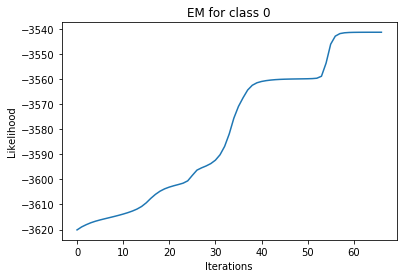

In [11]:
a0 = GMM(X_0, 2)
a1 = GMM(X_1, 2)
plt.plot(a0[3]);
plt.xlabel('Iterations'); plt.ylabel('Likelihood');
plt.title('EM for class 0')

Text(0.5, 1.0, 'EM for class 1')

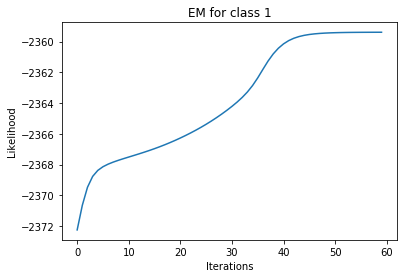

In [12]:
plt.plot(a1[3])
plt.xlabel('Iterations'); plt.ylabel('Likelihood');
plt.title('EM for class 1')

In [13]:
#building the bayes classifier for this GMM.
#how to choose priors?

def g3(x, a0, a1, p0):
    #a0, a1: parameters from EM for GMM. p0: prior probabilities
    if(p0*calc_p_gmm(x, a0) > (1-p0)*calc_p_gmm(x, a1)):
        return 0
    else:
        return 1

#calculating accuracy on the test set.
C = np.zeros((2,2)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = g3(X_test[i], a0, a1, 0.5)
    C[y_pred, Y_test[i]] += 1
acc = (C[0,0] + C[1,1])/np.sum(C)
prec = (C[1,1])/(C[1,1] + C[1,0])
rec = C[1,1]/(C[1,1] + C[0,1])
f1 = 2*prec*rec/(prec + rec)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, f1 = {f1}')
print(f'Confusion Matrix = {C}')

#84 percent accuracy acheived. Almost Same as previous case. Maybe varying priors will give better results.

#How to visualize these GMMs ??

Accuracy = 0.8361581920903954, Precision = 0.8652482269503546, Recall = 0.7577639751552795, f1 = 0.8079470198675497
Confusion Matrix = [[174.  39.]
 [ 19. 122.]]


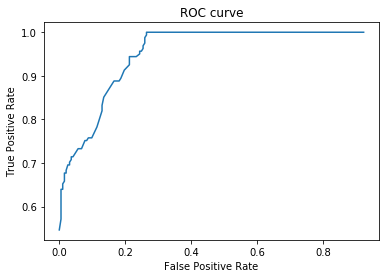

In [14]:
#plotting ROC curve.
TP = []
FP = []
for p0 in np.linspace(0.000001,0.99,100):

    C = np.zeros((2,2))
    for i in range((X_test.shape[0])):
        y_pred = g3(X_test[i], a0, a1, p0)
        C[y_pred, Y_test[i]] += 1
    
    tpr = C[1,1]/(C[1,1] + C[0,1])
    fpr = C[1,0]/(C[1,0] + C[0,0])
    TP.append(tpr)
    FP.append(fpr)

plt.plot(FP, TP, '-')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

#visualizing bias-variance trade off? Increasing model capacity(k) and then getting training and testing accuracies.
train_accuracies = []
train_loss = []

test_accuracies = []
test_loss = []

#lets define... 0-1 loss
def loss(y, y_):
    return np.abs(y - y_)

for k in range(2, 7):
    a0 = GMM(X_0, k)
    a1 = GMM(X_1, k)
    
    C = np.zeros((2,2)) #[[]]
    l = 0
    for i in range((X_test.shape[0])):
        y_pred = g3(X_test[i], a0, a1, 0.5)
        l += loss(y_pred, Y_test[i])
        C[y_pred, Y_test[i]] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C)
    test_accuracies.append(acc)
    test_loss.append(l)
    
    
    C = np.zeros((2,2)) #[[]]
    l = 0
    for i in range((X_train.shape[0])):
        y_pred = g3(X_train[i], a0, a1, 0.5)
        l += loss(y_pred, Y_train[i])
        C[y_pred, Y_train[i]] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C)
    train_accuracies.append(acc)
    train_loss.append(l)   

plt.plot(train_loss, 'b-');
plt.plot(test_loss, 'r-');
plt.xlabel('model capacity');
plt.ylabel('loss');
plt.title('Bias Variance Trade Off?');

# MAP Estimation
with guassian prior

In [15]:
_X_ = np.copy(X)

In [16]:
def MAP(X, mu_0, sigma_0):
    #mu = np.zeros(X.shape[1])
    sigma = np.cov(X, rowvar = False); #guess for cov matrix of X.

    #prior_distribution
    N = X.shape[0]

    mu_n_ = np.sum(X, axis=0)/N
    print(f'Sample mean = {mu_n_}')
    
    mu_n = sigma_0 @ np.linalg.inv(sigma_0 + sigma/N) @ mu_n_[:, np.newaxis] + sigma @ np.linalg.inv(sigma_0 + (sigma)/N) @ mu_0[:, np.newaxis]/N
    sigma_n = sigma_0 @ np.linalg.inv(sigma_0 + sigma/N) @ sigma/N
    
    return mu_n, sigma + sigma_n
    #p(x | D) ~ N(mu_n, sigma + sigma_n).
    #p(mu | D) ~ N(mu_n, sigma_n).


# How to choose bias

We claim that for healthy people, the average age should be low. The resting blood pressure will also be low, and cholestrol will also be low. Reverse for unhealthy people.

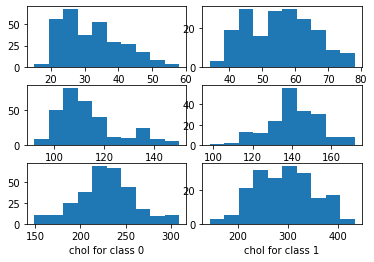

In [17]:
fig, ax = plt.subplots(3, 2, gridspec_kw={'wspace':0.1, 'hspace':0.3})
#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [15, 9]
titles = ['Age', 'rbps', 'chol'];

for i in range(3):
    ax[i][0].hist(X_0[:,i]); ax[i][1].hist(X_1[:,i]); ax[i][0].set_xlabel(f'{titles[i]} for class 0'); ax[i][1].set_xlabel(f'{titles[i]} for class 1'); 

In [18]:
mu_guess_0 = np.array([25, 110, 220])
mu_guess_1 = np.array([65, 140, 300])
sigma_guess = np.array([[10,0,0],[0,20,0],[0,0,30]]) #uncerainty in the guess

mu_0, s_0 = MAP(X_0, mu_guess_0, sigma_guess)
mu_1, s_1 = MAP(X_1, mu_guess_1, sigma_guess)

s_0 = np.linalg.inv(s_0)
s_1 = np.linalg.inv(s_1)
mu_0 = mu_0.reshape(-1)
mu_1 = mu_1.reshape(-1)
#print(mu_0, mu_1)
#Assuming same covariance matrix, only mu_0, mu_1 are parameters.
#let us build the classifier now.

Sample mean = [ 32.01655629 113.45033113 227.48675497]
Sample mean = [ 55.17647059 140.35294118 291.50802139]


In [19]:
s = 0.5*np.log(np.linalg.det(s_0)/np.linalg.det(s_1))

def g_map(x, p0):
    p = np.log(p0/(1-p0))
    y = p + s -0.5*((x - mu_0) @ s_0 @ (x-mu_0).T - (x - mu_1) @ s_1 @ (x - mu_1))
    #print(y)
    if (y > 0): 
        return 0
    else:return 1

p0 = 0.5
C = np.zeros((2,2)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = g_map(X_test[i], p0)
    C[y_pred, Y_test[i]] += 1
    
acc = (C[0,0] + C[1,1])/np.sum(C)
prec = (C[1,1])/(C[1,1] + C[1,0])
rec = C[1,1]/(C[1,1] + C[0,1])
f1 = 2*prec*rec/(prec + rec)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, f1 = {f1}')
print(f'Confusion Matrix = {C}')
#lets evaluate it now.

Accuracy = 0.8615819209039548, Precision = 0.8414634146341463, Recall = 0.8571428571428571, f1 = 0.8492307692307692
Confusion Matrix = [[167.  23.]
 [ 26. 138.]]


# Using PCA to visualize the input data

PCA( _Principal Component Analysis_ ) is a technique that can be used to reduce the dimensions of the dataset. Here I will use it so that I can reduce the dimension of the input data(3) to 2 so that I can easily plot it on a 2-D graph for better visualization.

In [20]:
print(_X_ - X)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [21]:
#data visualization with PCA, so that i can reduce the number of dimensions to 2 and plot them easily.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, svd_solver = 'randomized', random_state = 1)
X_ = pca.fit_transform(X);
X_ = pca.fit_transform(X)

In [22]:
X_.shape
X_

array([[ -18.62194575,  -18.26683414],
       [-103.12017852,    1.46545713],
       [ -36.03888279,  -14.4072617 ],
       ...,
       [ -36.08533882,    7.78732829],
       [ -17.64415421,   -0.37499993],
       [  -3.83772892,    6.83147592]])

array([[ -18.62194575,  -18.26683414],
       [-103.12017852,    1.46545713],
       [ -36.03888279,  -14.4072617 ],
       ...,
       [ -36.08533882,    7.78732829],
       [ -17.64415421,   -0.37499993],
       [  -3.83772892,    6.83147592]])

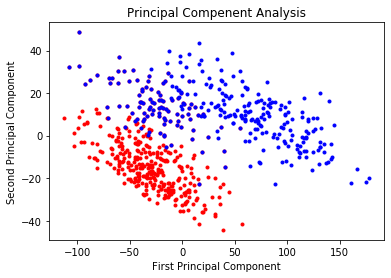

In [23]:
X__0 = X_[Y==0]
X__1 = X_[Y==1]
plt.close()
fig, ax = plt.subplots()
#ax.set_xlim(left = -50,right = 50)
ax.plot(X__0[:,0],X__0[:,1], 'r.');
ax.plot(X__1[:,0],X__1[:,1], 'b.');
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title("Principal Compenent Analysis")
X_

Note that the data is _nearly_ linearly separable in two dimensions. If we find out the eigen values of the covariance matrix, we find out that the PCA in two dimensions actually makes sense because one of the eigen values is negligible.

In [24]:
a = np.linalg.eigh(np.cov(X, rowvar = False))
print(a)
#PCA seems to be a good method.

(array([  40.23041129,  317.09909608, 3229.19618034]), array([[ 0.84214145,  0.50926223,  0.17734078],
       [-0.53666212,  0.82369458,  0.18308746],
       [-0.05283512, -0.24935762,  0.96696909]]))


Done.


[]

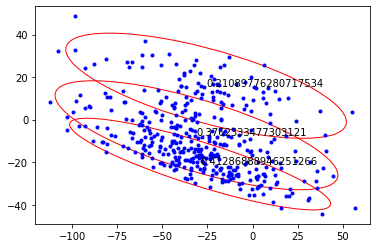

In [25]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
a_ = GMM(X__0, 3)
U = a_[1]
P = a_[0]
S = a_[2]
def confidence_ellipse(cov, u, ax, n_std=3.0, facecolor='none', **kwargs):

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = u[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = u[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
fig, ax = plt.subplots()
ax.plot(X__0[:,0], X__0[:, 1], 'b.')

for k in range(U.shape[0]):
    ax.text(U[k][0], U[k][1], "{}".format(P[k]))
    confidence_ellipse(S[k], U[k], ax, n_std=2.5, edgecolor='red')
plt.plot()